# Import Libraries

In [9]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; import matplotlib as mpl; import gsw

# Preparation (files and shapes)
w = GB, t = WGOM, y = EGOM, v = SMAB, x = NMAB

In [2]:
filenow = 'glorys12v1_depth.nc'
BC=Dataset(filenow); BS=xr.open_dataset(filenow)
glorysdepth = np.asarray(BS['depth'].values)

In [3]:
glorys12v1 ='global-reanalysis-phy-001-030-daily_1596465428590.nc'
DS=xr.open_dataset(glorys12v1)

In [4]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [5]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [6]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [7]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [8]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

# Algorithm

In [9]:
# countwithinpolygon = []; densmld = []; obs_lat = []; obs_lon = []; date_no = []; bottomdepth = []; years = []

# for year in range(1993,2019):
#     filename = 'casts_{}.mat'.format(year)
#     file = scipy.io.loadmat(filename,squeeze_me=True)
#     npfile = file['casts_{}'.format(year)]
    
#     lat_intermediate = []; lon_intermediate = []; p_intermediate = []; 
#     t_intermediate = []; yd_intermediate = []; sal_intermediate = []; floor_intermediate = []
    
#     for i in range(len(npfile)):
#         yd = npfile[i]['yd']
#         p = npfile[i]['p']
#         s = npfile[i]['s']
#         t = npfile[i]['t']
#         gear = npfile[i]['gear']
#         floordepth = npfile[i]['depth']
                
# #         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
#         if yd >= 0 and yd <= 365: 
#             lat_intermediate.append(npfile[i]['lat'])
#             lon_intermediate.append(npfile[i]['lon'])
#             p_intermediate.append(npfile[i]['p'])
#             t_intermediate.append(npfile[i]['t'])
#             yd_intermediate.append(npfile[i]['yd'])
#             sal_intermediate.append(npfile[i]['s'])
#             floor_intermediate.append(npfile[i]['depth'])
#     month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
#     newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
#     for ii in range(len(month_df)):
#         new = newdf.iloc[ii].values
#         point = Point(new)
#         if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#             pass
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_v.contains(point) == True:
#             SA = gsw.SA_from_SP(month_df['s'].iloc[ii],month_df['p'].iloc[ii],month_df['lon'].iloc[ii],month_df['lat'].iloc[ii])
#             CT = gsw.CT_from_pt(SA,month_df['t'].iloc[ii])
#             DENS = gsw.sigma0(SA,CT)
#             pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
#             df_ptsnew = pt_df.dropna()
#             df_final = pd.DataFrame(df_ptsnew.values)
#             countwithinpolygon.append(1)
#             l=[i for i in df_final[0] if i<=5] 
#             if len(l) > 0:
#                 surfaceval = []
#                 numrange = []
#                 for iii in range(len(l)):
#                     val = df_final[4][iii]
#                     numrange.append(iii)
#                     surfaceval.append(val)            
#             surfacevalmean = statistics.mean(surfaceval)
#             densfin = []; tempfin = []; pressurefin = []; salfin = []
#             for iii in range(numrange[-1]+1,len(df_final)): #change back to numrange[-1] as range(numrange[-1],len...)
#                 tempfin.append(df_final[1][iii])
#                 pressurefin.append(df_final[0][iii])
#                 salfin.append(df_final[2][iii])
#                 densfin.append(df_final[4][iii])
#             d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
#             dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
#             dffinunreversed = pd.DataFrame(dunreversed)
#             dffin = pd.DataFrame(d)
                        
#             for ix in range(len(dffinunreversed)):
#                 if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                     if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
#                         looknow = list(dffinunreversed['density'].values)
#                         looknow2 = [i for i in looknow if i >= (surfacevalmean + dens_threshold)]
#                         looknow3 = [i for i in looknow if i <= (surfacevalmean - dens_threshold)]
#                         if len(looknow2) == 0 and len(looknow3) == 0:
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
#                                 densmld.append(month_df['depth'].iloc[ii])
#                                 obs_lat.append(month_df['lat'].iloc[ii])
#                                 obs_lon.append(month_df['lon'].iloc[ii])
#                                 date_no.append(month_df['day'].iloc[ii])
#                                 bottomdepth.append(month_df['depth'].iloc[ii])
#                                 years.append(year)
#                                 break
#                             else:
#                                 break       
#                         else: #
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
#                                 for ix in range(len(dffinunreversed['density'])):
#                                     if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                                         pass
#                                     else:
#                                         densmld.append(month_df['depth'].iloc[ii])
#                                         obs_lat.append(month_df['lat'].iloc[ii])
#                                         obs_lon.append(month_df['lon'].iloc[ii])
#                                         date_no.append(month_df['day'].iloc[ii])
#                                         bottomdepth.append(month_df['depth'].iloc[ii])
#                                         years.append(year)
#                                         break
#                             else:
#                                 break
#                     else:
#                         if dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
#                                 pass
#                             else:
#                                 densmld.append(month_df['depth'].iloc[ii])
#                                 obs_lat.append(month_df['lat'].iloc[ii])
#                                 obs_lon.append(month_df['lon'].iloc[ii])
#                                 date_no.append(month_df['day'].iloc[ii])
#                                 bottomdepth.append(month_df['depth'].iloc[ii])
#                                 years.append(year)
#                                 break        
#                         else: 
#                             if dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold):
#                                 break
#             elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
#                     if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
#                         pass
#                     else:
#                         for ix in range(len(dffinunreversed['density'])):
#                             if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                                 pass
#                             else:
#                                 densmld.append(month_df['depth'].iloc[ii])
#                                 obs_lat.append(month_df['lat'].iloc[ii])
#                                 obs_lon.append(month_df['lon'].iloc[ii])
#                                 date_no.append(month_df['day'].iloc[ii])
#                                 bottomdepth.append(month_df['depth'].iloc[ii])
#                                 years.append(year)
#                                 break
#                         break
#                 else: 
#                     break
#     print(year, len(densmld))
#     print(year, len(countwithinpolygon))


In [12]:
dens_threshold = 0.03

In [13]:
print(dens_threshold)

0.03


In [41]:
countwithinpolygon = []; densmld = []; obs_lat = []; obs_lon = []; date_no = []; bottomdepth = []; years = []
yearwithdata = []; datefull = []; finallatestdepth = []; glorysmld = []
glorys_lat = []; glorys_lon = []; glorys_lat_index = []; glorys_lon_index = []

for year in range(1994,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; counterii = []
    t_intermediate = []; yd_intermediate = []; sal_intermediate = []; floor_intermediate = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59):
#         if yd >= 155 and yd < 156:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_v.contains(point) == True:
            SA = gsw.SA_from_SP(month_df['s'].iloc[ii],month_df['p'].iloc[ii],month_df['lon'].iloc[ii],month_df['lat'].iloc[ii])
            CT = gsw.CT_from_pt(SA,month_df['t'].iloc[ii])
            DENS = gsw.sigma0(SA,CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=5] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)): #for iii in range(numrange[-1]+1,len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
#             print(dffin)
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + dens_threshold) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - dens_threshold):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + dens_threshold)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - dens_threshold)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
                                densmld.append(month_df['depth'].iloc[ii])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                # PLOTTING
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
#                                 plt.plot(df_final[1], df_final[0]*-1)
#                                 plt.show()
                                break
                            else:#here
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='darkblue', linestyle='--',alpha = 1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
#                                 plt.plot(df_final[1], df_final[0]*-1)
#                                 plt.show()
                                break 
                        else:
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
                                        pass
                                    else:
                                        densmld.append(month_df['depth'].iloc[ii])
                                        obs_lat.append(month_df['lat'].iloc[ii])
                                        obs_lon.append(month_df['lon'].iloc[ii])
                                        date_no.append(month_df['day'].iloc[ii])
                                        bottomdepth.append(month_df['depth'].iloc[ii])
                                        years.append(year)
                                        counterii.append(ii)
                                        #plotting
#                                         plt.plot(df_final[4], df_final[0]*-1)
#                                         plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='gray', linestyle='--',alpha = 1)
#                                         plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                         plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                         plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                         plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                         plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                         plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                         plt.show()
#                                         plt.plot(df_final[1], df_final[0]*-1)
#                                         plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                         plt.axhline(y=24*-1,color='gray', linestyle='--',alpha = 1)
#                                         plt.axvline(x=5.25,color='green', linestyle='--',alpha = 1)
#                                         plt.axvline(x=5.25+0.2,color='green', linestyle='--',alpha = 0.5)
#                                         plt.axvline(x=5.25-0.2,color='green', linestyle='--',alpha = 0.5)
#                                         plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                         plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
                                        plt.show()
                                        break
                                break
                            else:
                                break
                    else: 
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
                                pass
                            else:
                                densmld.append(dffinunreversed.at[ix,'pressure'])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 PLOTTING 
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='purple', linestyle='--',alpha = 0.5)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
#                                 plt.plot(df_final[1], df_final[0]*-1)
#                                 plt.show()
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold):
                                break 
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
                    if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                                 print(dffinunreversed.at[ix,'density'])
                                pass
                            else:
#                                 print('no')
#                                 print('surfacevalmean: ', surfacevalmean)
                                densmld.append(dffinunreversed.at[ix,'pressure'])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                # PLOTTING
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='darkblue', linestyle='--',alpha = 1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                 plt.axhline(y=47*-1,color='black',linewidth=2.0, linestyle='--',alpha = 1)
# #                                 plt.axvline(x=7.0360000000000005,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=7.0360000000000005+0.2,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=7.0360000000000005-0.2,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+dens_threshold,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-dens_threshold,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
#                                 plt.plot(df_final[1], df_final[0]*-1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=9.43,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=9.43+0.2,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=9.43-0.2,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axhline(y=15*-1,color='darkblue', linestyle='--',alpha = 1)
#                                 plt.show()
                                break
                        break
                else: 
                    break
                                
#     inlat = []; inlon = []; date = []
#     g_lat = []; g_lon = []; g_indexlon = []; g_indexlat = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#         date.append(newdf['date'][timer])
#     datefull.append(date)
#     for x in range(len(date)):
#         use=DS.sel(time=slice('{}-12-01'.format(year),'{}-12-31'.format(year))) 
#         locate_date = use.sel(time=use.time.dt.day==(date[x])-334)
#         mld_locate_date = locate_date.mlotst.values[0]
    
#         lat = np.array(locate_date.mlotst['latitude'][:])
#         long = np.array(locate_date.mlotst['longitude'][:])
    
#         lonneg = [float(i)*-1 for i in inlon]
#         distanceslat = []; distanceslon = []
#         for i in range(133):
#             distanceslat.append((inlat[x] - lat[i])**2)
#             index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
#         for ii in range(181):
#             distanceslon.append((lonneg[x] - long[ii])**2)
#             index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
#         lat_index_use, lon_index_use = index_min_lat, index_min_lon
#         gloryslonval = float(DS['longitude'][index_min_lon])
#         gloryslatval = float(DS['latitude'][index_min_lat])
#         g_lat.append(gloryslatval)
#         glorys_lat.append(gloryslatval)
#         g_lon.append(gloryslonval)
#         glorys_lon.append(gloryslonval)
#         g_indexlat.append(index_min_lat)
#         glorys_lat_index.append(index_min_lat)
#         g_indexlon.append(index_min_lon)
#         glorys_lon_index.append(index_min_lon)
#         glorysmld.append(mld_locate_date[lat_index_use, lon_index_use]) 
#     print('**********')
#     print(year)
#     print(len(countwithinpolygon))
#     print(len(densmld))
#     print(len(obs_lat))
#     print(len(obs_lon))
#     print(len(date_no))
#     print(len(bottomdepth))
#     print(len(years))
#     print(len(glorysmld))
#     print(len(glorys_lat))
#     print(len(glorys_lon))
#     print(len(glorys_lat_index))
#     print(len(glorys_lon_index))
#     print('')

In [43]:
print(len(obs_lat))
# print(obs_lon)

4057


In [3659]:
print(dens_threshold)

0.01


In [3664]:
temp_threshold = 0.2

In [3665]:
countwithinpolygon = []; tempmld = []; obs_lat = []; obs_lon = []; date_no = []; bottomdepth = []; years = []
yearwithdata = []; datefull = []; finallatestdepth = []; glorysmld = []
glorys_lat = []; glorys_lon = []; glorys_lat_index = []; glorys_lon_index = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; counterii = []
    t_intermediate = []; yd_intermediate = []; sal_intermediate = []; floor_intermediate = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if yd == 0:
        if yd > 334 and yd <= 365:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_v.contains(point) == True:
            SA = gsw.SA_from_SP(month_df['s'].iloc[ii],month_df['p'].iloc[ii],month_df['lon'].iloc[ii],month_df['lat'].iloc[ii])
            CT = gsw.CT_from_pt(SA,month_df['t'].iloc[ii])
            DENS = gsw.sigma0(SA,CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=5] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)

            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - temp_threshold) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + temp_threshold):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + temp_threshold) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - temp_threshold):
                        looknow = list(dffinunreversed['temp'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + temp_threshold)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - temp_threshold)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
                                tempmld.append(month_df['depth'].iloc[ii])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                # PLOTTING
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
                                break
                            else:#here
                                break 
                        else:
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
                                for ix in range(len(dffinunreversed['temp'])):
                                    if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - temp_threshold) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + temp_threshold):
                                        pass
                                    else:
                                        tempmld.append(month_df['depth'].iloc[ii])
                                        obs_lat.append(month_df['lat'].iloc[ii])
                                        obs_lon.append(month_df['lon'].iloc[ii])
                                        date_no.append(month_df['day'].iloc[ii])
                                        bottomdepth.append(month_df['depth'].iloc[ii])
                                        years.append(year)
                                        counterii.append(ii)
#                                         PLOTTING problem here
#                                         plt.plot(df_final[4], df_final[0]*-1)
#                                         plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='gray', linestyle='--',alpha = 1)
#                                         plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                         plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                         plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                         plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                         plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                         plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                         plt.show()
                                        break
                                break
                            else:
                                break
                    else: 
                        if dffinunreversed.at[ix,'temp'] <= (surfacevalmean - temp_threshold) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + temp_threshold):
                            if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
                                pass
                            else:
                                tempmld.append(dffinunreversed.at[ix,'pressure'])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 PLOTTING 
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='purple', linestyle='--',alpha = 0.5)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
                                break           
                        else: 
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean + temp_threshold) or dffinunreversed.at[ix,'temp'] <= (surfacevalmean - temp_threshold):
                                break 
                elif dffinunreversed.at[ix,'temp'] <= (surfacevalmean - temp_threshold) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + temp_threshold):
                    if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['temp'])):
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - temp_threshold) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + temp_threshold):
#                                 print(dffinunreversed.at[ix,'density'])
                                pass
                            else:
#                                 print('no')
#                                 print('surfacevalmean:*** ', surfacevalmean)
                                tempmld.append(dffinunreversed.at[ix,'pressure'])
                                obs_lat.append(month_df['lat'].iloc[ii])
                                obs_lon.append(month_df['lon'].iloc[ii])
                                date_no.append(month_df['day'].iloc[ii])
                                bottomdepth.append(month_df['depth'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                
                                # PLOTTING
#                                 plt.plot(df_final[4], df_final[0]*-1)
#                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='darkblue', linestyle='--',alpha = 1)
#                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
#                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
#                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
#                                 plt.show()
                                break
                        break
                else: 
                    break

    inlat = []; inlon = []; date = []
    g_lat = []; g_lon = []; g_indexlon = []; g_indexlat = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])
    datefull.append(date)
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-12-01'.format(year),'{}-12-31'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-334)
        mld_locate_date = locate_date.mlotst.values[0]
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        gloryslonval = float(DS['longitude'][index_min_lon])
        gloryslatval = float(DS['latitude'][index_min_lat])
        g_lat.append(gloryslatval)
        glorys_lat.append(gloryslatval)
        g_lon.append(gloryslonval)
        glorys_lon.append(gloryslonval)
        g_indexlat.append(index_min_lat)
        glorys_lat_index.append(index_min_lat)
        g_indexlon.append(index_min_lon)
        glorys_lon_index.append(index_min_lon)
        glorysmld.append(mld_locate_date[lat_index_use, lon_index_use]) 
    print('**********')
    print(year)
    print(len(countwithinpolygon))
    print(len(tempmld))
    print(len(obs_lat))
    print(len(obs_lon))
    print(len(date_no))
    print(len(bottomdepth))
    print(len(years))
    print(len(glorysmld))
    print(len(glorys_lat))
    print(len(glorys_lon))
    print(len(glorys_lat_index))
    print(len(glorys_lon_index))
    print('')

**********
1993
115
115
115
115
115
115
115
115
115
115
115
115

**********
1994
117
117
117
117
117
117
117
117
117
117
117
117

**********
1995
117
117
117
117
117
117
117
117
117
117
117
117

**********
1996
117
117
117
117
117
117
117
117
117
117
117
117

**********
1997
117
117
117
117
117
117
117
117
117
117
117
117

**********
1998
117
117
117
117
117
117
117
117
117
117
117
117

**********
1999
117
117
117
117
117
117
117
117
117
117
117
117

**********
2000
117
117
117
117
117
117
117
117
117
117
117
117

**********
2001
117
117
117
117
117
117
117
117
117
117
117
117

**********
2002
117
117
117
117
117
117
117
117
117
117
117
117

**********
2003
117
117
117
117
117
117
117
117
117
117
117
117

**********
2004
117
117
117
117
117
117
117
117
117
117
117
117

**********
2005
117
117
117
117
117
117
117
117
117
117
117
117

**********
2006
117
117
117
117
117
117
117
117
117
117
117
117

**********
2007
117
117
117
117
117
117
117
117
117
117
117
117

**********
2008
117
117
1

In [3666]:
print(len(tempmld))
print(len(glorysmld))

247
247


In [3667]:
print(np.mean(tempmld))
print(np.nanmean(glorysmld))

47.06072874493927
37.273357


In [3660]:
print(len(densmld))
print(len(glorysmld))

244
244


In [3661]:
print(np.mean(densmld))
print(np.nanmean(glorysmld))

29.491803278688526
37.32264


In [3668]:
pandas_02 = pd.DataFrame({'obs_lat': obs_lat,'obs_lon': obs_lon, 'glorys_lat': glorys_lat, 'glorys_lon': glorys_lon,
                      'glorys_lat_index': glorys_lat_index, 'glorys_lon_index': glorys_lon_index, 
                      'bottomdepth':bottomdepth,'year':years, 'date_no':date_no, '02tempmld':tempmld, 'glorys_mld': glorysmld}) 

In [3669]:
print(len(pandas_02))

247


In [3662]:
pandas_001 = pd.DataFrame({'obs_lat': obs_lat,'obs_lon': obs_lon, 'glorys_lat': glorys_lat, 'glorys_lon': glorys_lon,
                      'glorys_lat_index': glorys_lat_index, 'glorys_lon_index': glorys_lon_index, 
                      'bottomdepth':bottomdepth,'year':years, 'date_no':date_no, '001densmld':densmld, 'glorys_mld': glorysmld}) 


In [3663]:
print(len(pandas_001))

244


In [3654]:
pandas = pd.DataFrame({'obs_lat': obs_lat,'obs_lon': obs_lon, 'glorys_lat': glorys_lat, 'glorys_lon': glorys_lon,
                      'glorys_lat_index': glorys_lat_index, 'glorys_lon_index': glorys_lon_index, 
                      'bottomdepth':bottomdepth,'year':years, 'date_no':date_no, '003densmld':densmld, 'glorys_mld': glorysmld}) 



In [3655]:
print(len(pandas))

244


In [3670]:
pandas_02new = pandas_02.assign(location=[*zip(pandas_02.glorys_lat_index, pandas_02.glorys_lon_index, pandas_02.year, pandas_02.obs_lon, pandas_02.obs_lat,pandas_02.date_no)])



In [3671]:
pandas_001new = pandas_001.assign(location=[*zip(pandas_001.glorys_lat_index, pandas_001.glorys_lon_index, pandas_001.year, pandas_001.obs_lon, pandas_001.obs_lat,pandas_001.date_no)])



In [3672]:
pandas_003new = pandas.assign(location=[*zip(pandas.glorys_lat_index, pandas.glorys_lon_index, pandas.year, pandas.obs_lon, pandas.obs_lat, pandas.date_no)])


In [3673]:
print(len(pandas_003new['location'].unique()))
print(len(pandas_02new['location'].unique()))
print(len(pandas_001new['location'].unique()))

244
247
244


In [3674]:
print(len(pandas_003new))
print(len(pandas_02new))
print(len(pandas_001new))

244
247
244


In [3675]:
pandas_003new = pandas_003new.drop_duplicates(subset=['location'])
pandas_02new = pandas_02new.drop_duplicates(subset=['location'])
pandas_001new = pandas_001new.drop_duplicates(subset=['location'])

In [3676]:
pandas_001and003 = pd.merge(pandas_001new, pandas_003new, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)

In [3677]:
print(len(pandas_001and003))

244


In [3678]:
pandas_00100302 = pd.merge(pandas_001and003, pandas_02new, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)

In [3679]:
print(len(pandas_00100302))

247


In [3680]:
print(pandas_00100302)

     obs_lat_x  obs_lon_x  glorys_lat_x  glorys_lon_x  glorys_lat_index_x  \
0      40.9000    70.6833     40.916668    -70.666664                71.0   
1      41.0350    70.3667     41.000000    -70.333336                72.0   
2      41.0650    70.0300     41.083332    -70.000000                73.0   
3      40.9317    70.1333     40.916668    -70.166664                71.0   
4      40.9300    69.9850     40.916668    -70.000000                71.0   
..         ...        ...           ...           ...                 ...   
245    41.0367    70.3983     41.000000    -70.416664                72.0   
246    41.0600    70.5133     41.083332    -70.500000                73.0   
150        NaN        NaN           NaN           NaN                 NaN   
220        NaN        NaN           NaN           NaN                 NaN   
244        NaN        NaN           NaN           NaN                 NaN   

     glorys_lon_index_x  bottomdepth_x  year_x  date_no_x  001densmld  ... 

In [3681]:
print(len(pandas_00100302))

247


In [3682]:
print(len(pandas_001and003))

244


In [3683]:
for col in pandas_00100302.columns: 
    print(col)

obs_lat_x
obs_lon_x
glorys_lat_x
glorys_lon_x
glorys_lat_index_x
glorys_lon_index_x
bottomdepth_x
year_x
date_no_x
001densmld
glorys_mld_x
location
obs_lat_y
obs_lon_y
glorys_lat_y
glorys_lon_y
glorys_lat_index_y
glorys_lon_index_y
bottomdepth_y
year_y
date_no_y
003densmld
glorys_mld_y
obs_lat
obs_lon
glorys_lat
glorys_lon
glorys_lat_index
glorys_lon_index
bottomdepth
year
date_no
02tempmld
glorys_mld


In [3684]:
pandas_00100302.glorys_mld = pandas_00100302.glorys_mld.combine_first(pandas_00100302.glorys_mld_x) 
pandas_00100302.glorys_mld = pandas_00100302.glorys_mld.combine_first(pandas_00100302.glorys_mld_y) 

pandas_00100302.obs_lat = pandas_00100302.obs_lat.combine_first(pandas_00100302.obs_lat_x) 
pandas_00100302.obs_lat = pandas_00100302.obs_lat.combine_first(pandas_00100302.obs_lat_y)

pandas_00100302.obs_lon = pandas_00100302.obs_lon.combine_first(pandas_00100302.obs_lon_x) 
pandas_00100302.obs_lon = pandas_00100302.obs_lon.combine_first(pandas_00100302.obs_lon_y)

pandas_00100302.glorys_lat = pandas_00100302.glorys_lat.combine_first(pandas_00100302.glorys_lat_x) 
pandas_00100302.glorys_lat = pandas_00100302.glorys_lat.combine_first(pandas_00100302.glorys_lat_y)

pandas_00100302.glorys_lon = pandas_00100302.glorys_lon.combine_first(pandas_00100302.glorys_lon_x) 
pandas_00100302.glorys_lon = pandas_00100302.glorys_lon.combine_first(pandas_00100302.glorys_lon_y)

pandas_00100302.glorys_lat_index = pandas_00100302.glorys_lat_index.combine_first(pandas_00100302.glorys_lat_index_x) 
pandas_00100302.glorys_lat_index = pandas_00100302.glorys_lat_index.combine_first(pandas_00100302.glorys_lat_index_y)

pandas_00100302.glorys_lon_index = pandas_00100302.glorys_lon_index.combine_first(pandas_00100302.glorys_lon_index_x) 
pandas_00100302.glorys_lon_index = pandas_00100302.glorys_lon_index.combine_first(pandas_00100302.glorys_lon_index_y)

pandas_00100302.bottomdepth = pandas_00100302.bottomdepth.combine_first(pandas_00100302.bottomdepth_x) 
pandas_00100302.bottomdepth = pandas_00100302.bottomdepth.combine_first(pandas_00100302.bottomdepth_y)

pandas_00100302.year = pandas_00100302.year.combine_first(pandas_00100302.year_x) 
pandas_00100302.year = pandas_00100302.year.combine_first(pandas_00100302.year_y)

pandas_00100302.date_no = pandas_00100302.date_no.combine_first(pandas_00100302.date_no_x) 
pandas_00100302.date_no = pandas_00100302.date_no.combine_first(pandas_00100302.date_no_y)


In [3685]:
pandas_00100302new = pandas_00100302.drop(columns=['obs_lat_x', 'obs_lon_x', 'glorys_lat_x', 'glorys_lon_x', 'glorys_lat_index_x', 'glorys_lon_index_x', 
                               'year_x', 'date_no_x', 'bottomdepth_x','glorys_mld_x' ])

pandas_00100302new = pandas_00100302new.drop(columns=['obs_lat_y', 'obs_lon_y', 'glorys_lat_y', 'glorys_lon_y', 'glorys_lat_index_y', 'glorys_lon_index_y', 
                               'year_y', 'date_no_y', 'bottomdepth_y','glorys_mld_y' ])

In [3686]:
print(pandas_00100302new)

     001densmld                               location  003densmld  obs_lat  \
0          32.0     (71, 88, 1993, 70.6833, 40.9, 335)        53.0  40.9000   
1          40.0   (72, 92, 1993, 70.3667, 41.035, 335)        40.0  41.0350   
2          18.0     (73, 96, 1993, 70.03, 41.065, 335)        25.0  41.0650   
3          24.0  (71, 94, 1993, 70.1333, 40.9317, 335)        24.0  40.9317   
4          22.0     (71, 96, 1993, 69.985, 40.93, 335)        22.0  40.9300   
..          ...                                    ...         ...      ...   
245        17.0  (72, 91, 2011, 70.3983, 41.0367, 342)        30.0  41.0367   
246        16.0    (73, 90, 2011, 70.5133, 41.06, 342)        23.0  41.0600   
150         NaN    (87, 94, 2010, 70.1267, 42.25, 337)         NaN  42.2500   
220         NaN  (96, 95, 2011, 70.0833, 43.0267, 339)         NaN  43.0267   
244         NaN  (72, 92, 2011, 70.3333, 41.0367, 342)         NaN  41.0367   

     obs_lon  glorys_lat  glorys_lon  glorys_lat_in

In [63]:
# print(pandas_00100302new.shape)
ZC = pd.read_csv('12.csv') # change according to month
print(ZC.shape)
file_in ='12.nc' # change according to month
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

(258, 9)


In [66]:
glorysdens_myway = []; indices = []; news = []; newnews = []
for i in range(len(DS['T'])):
    a = np.asarray(DS['T'][i])
    b = np.asarray(DS['S'][i])
    ctemp = []; density = []
    for ii in range(len(a)):
        CT = gsw.CT_from_pt(b[ii],a[ii])
        ctemp.append(CT)
        DENS = gsw.sigma0(b[ii],CT)
        density.append(DENS)
    dffinunreversed = pd.DataFrame({'temp': a,'sal': b, 's': b, 'CT': ctemp, 'density': density, 'depth':glorysdepth})
    surfacevalmean = np.mean(dffinunreversed['density'][0:5])
    news.append(surfacevalmean)
    newnews.append(dffinunreversed)
for v in range(len(newnews)):
    dffinunreversednow = newnews[v]
    for ix in range(len(dffinunreversednow)):
        if dffinunreversednow.at[ix,'density'] >= (news[v] - 0.03) and dffinunreversednow.at[ix,'density'] <= (news[v] + 0.03):
            pass
        else:
            if dffinunreversednow.at[ix,'depth'] >= 5.5:
                glorysdens_myway.append(dffinunreversednow.at[ix,'depth'])
#                 plt.plot(dffinunreversednow['density'][:18],dffinunreversed['depth'][:18]*-1)
#                 plt.axhline(y=dffinunreversednow.at[ix,'depth']*-1, color='r', linestyle='--')
#                 plt.show()
                indices.append(v)
                break
            break

/anaconda3/lib/python3.7/site-packages/gsw/_wrapped_ufuncs.py:3394: RuntimeWarning: overflow encountered in sigma0
  return _gsw_ufuncs.sigma0(SA, CT)


In [67]:
myglorysmld = pd.DataFrame({'indices': indices,'glorysmld_new003':glorysdens_myway})

In [68]:
print(np.nanmax(glorysdens_myway))
print(np.nanmin(glorysdens_myway))
print(len(glorysdens_myway))
print(np.nanmean(glorysdens_myway))

92.32607
7.92956
258
44.034763


In [3704]:
print(ZC)

     Unnamed: 0  obs_lat  obs_lon  date  year  glorys_index_lat  \
0             0  40.9000  70.6833   335  1993                71   
1             1  41.0350  70.3667   335  1993                72   
2             2  41.0650  70.0300   335  1993                73   
3             3  40.9317  70.1333   335  1993                71   
4             4  40.9300  69.9850   335  1993                71   
..          ...      ...      ...   ...   ...               ...   
253         253  41.0383  70.2283   342  2011                72   
254         254  41.0367  70.2817   342  2011                72   
255         255  41.0367  70.3333   342  2011                72   
256         256  41.0367  70.3983   342  2011                72   
257         257  41.0600  70.5133   342  2011                73   

     glorys_index_lon  glorys_lat  glorys_lon  \
0                  88   40.916668  -70.666664   
1                  92   41.000000  -70.333336   
2                  96   41.083332  -70.000000   

In [3705]:
ZC = ZC.assign(location=[*zip(ZC.glorys_index_lat, ZC.glorys_index_lon, ZC.year, ZC.obs_lon, ZC.obs_lat, ZC.date)])


In [3706]:
merged_large = pd.merge(ZC, myglorysmld, left_on=['Unnamed: 0'], 
                        right_on = ['indices'], left_index=True, how='inner', sort=False)

In [3707]:
merged_large = merged_large.drop_duplicates(subset=['location'])

In [3695]:
# merged_large

In [3696]:
# print(pandas_00100302new)

In [3697]:
# new = pd.DataFrame({'location': merged_largenew['location'],'glorysmld_new003':merged_largenew['glorysmld_new']})

In [3698]:
# second time round
# new2 = pd.DataFrame({'location': merged_large['location'],'glorysmld_new001':merged_largenew['glorysmld_new']})

In [3699]:
fullpandasdataframe = pd.merge(pandas_00100302new, merged_large, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)

In [3700]:
print(len(fullpandasdataframe))

258


In [3708]:
fullpandasdataframefull = pd.merge(fullpandasdataframe, merged_large, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)

In [3709]:
print(fullpandasdataframe)

     001densmld                               location  003densmld  obs_lat_x  \
0          32.0     (71, 88, 1993, 70.6833, 40.9, 335)        53.0    40.9000   
1          40.0   (72, 92, 1993, 70.3667, 41.035, 335)        40.0    41.0350   
2          18.0     (73, 96, 1993, 70.03, 41.065, 335)        25.0    41.0650   
3          24.0  (71, 94, 1993, 70.1333, 40.9317, 335)        24.0    40.9317   
4          22.0     (71, 96, 1993, 69.985, 40.93, 335)        22.0    40.9300   
..          ...                                    ...         ...        ...   
241         NaN  (70, 94, 2011, 70.1467, 40.8733, 341)         NaN        NaN   
249         NaN  (71, 94, 2011, 70.1817, 40.9533, 342)         NaN        NaN   
250         NaN   (71, 95, 2011, 70.1133, 40.955, 342)         NaN        NaN   
251         NaN    (72, 95, 2011, 70.095, 41.035, 342)         NaN        NaN   
252         NaN  (72, 94, 2011, 70.1633, 41.0383, 342)         NaN        NaN   

     obs_lon_x  glorys_lat_

In [3710]:
print(fullpandasdataframefull)

     001densmld                               location  003densmld  obs_lat_x  \
0          32.0     (71, 88, 1993, 70.6833, 40.9, 335)        53.0    40.9000   
1          40.0   (72, 92, 1993, 70.3667, 41.035, 335)        40.0    41.0350   
2          18.0     (73, 96, 1993, 70.03, 41.065, 335)        25.0    41.0650   
3          24.0  (71, 94, 1993, 70.1333, 40.9317, 335)        24.0    40.9317   
4          22.0     (71, 96, 1993, 69.985, 40.93, 335)        22.0    40.9300   
..          ...                                    ...         ...        ...   
241         NaN  (70, 94, 2011, 70.1467, 40.8733, 341)         NaN        NaN   
249         NaN  (71, 94, 2011, 70.1817, 40.9533, 342)         NaN        NaN   
250         NaN   (71, 95, 2011, 70.1133, 40.955, 342)         NaN        NaN   
251         NaN    (72, 95, 2011, 70.095, 41.035, 342)         NaN        NaN   
252         NaN  (72, 94, 2011, 70.1633, 41.0383, 342)         NaN        NaN   

     obs_lon_x  glorys_lat_

In [3711]:
for col in fullpandasdataframefull.columns: 
    print(col)

001densmld
location
003densmld
obs_lat_x
obs_lon_x
glorys_lat_x
glorys_lon_x
glorys_lat_index
glorys_lon_index
bottomdepth
year_x
date_no
02tempmld
glorys_mld
Unnamed: 0_x
obs_lat_y
obs_lon_y
date_x
year_y
glorys_index_lat_x
glorys_index_lon_x
glorys_lat_y
glorys_lon_y
indices_x
glorysmld_new001
Unnamed: 0_y
obs_lat
obs_lon
date_y
year
glorys_index_lat_y
glorys_index_lon_y
glorys_lat
glorys_lon
indices_y
glorysmld_new003


In [3712]:
fullpandasdataframefull = fullpandasdataframefull.drop(columns=['indices_y', 'Unnamed: 0_y','location','Unnamed: 0_x','indices_x'])


In [3713]:
fullpandasdataframefull.obs_lat = fullpandasdataframefull.obs_lat.combine_first(fullpandasdataframefull.obs_lat_x) 
fullpandasdataframefull.obs_lat = fullpandasdataframefull.obs_lat.combine_first(fullpandasdataframefull.obs_lat_y) 

fullpandasdataframefull.obs_lon = fullpandasdataframefull.obs_lon.combine_first(fullpandasdataframefull.obs_lon_x) 
fullpandasdataframefull.obs_lon = fullpandasdataframefull.obs_lon.combine_first(fullpandasdataframefull.obs_lon_y)

fullpandasdataframefull.glorys_lat_index = fullpandasdataframefull.glorys_lat_index.combine_first(fullpandasdataframefull.glorys_index_lat_x) 
fullpandasdataframefull.glorys_lat_index = fullpandasdataframefull.glorys_lat_index.combine_first(fullpandasdataframefull.glorys_index_lat_y) 


fullpandasdataframefull.glorys_lon_index = fullpandasdataframefull.glorys_lon_index.combine_first(fullpandasdataframefull.glorys_index_lon_x) 
fullpandasdataframefull.glorys_lon_index = fullpandasdataframefull.glorys_lon_index.combine_first(fullpandasdataframefull.glorys_index_lon_y) 

fullpandasdataframefull.glorys_lat = fullpandasdataframefull.glorys_lat.combine_first(fullpandasdataframefull.glorys_lat_x) 
fullpandasdataframefull.glorys_lat = fullpandasdataframefull.glorys_lat.combine_first(fullpandasdataframefull.glorys_lat_y) 

fullpandasdataframefull.glorys_lon = fullpandasdataframefull.glorys_lon.combine_first(fullpandasdataframefull.glorys_lon_x) 
fullpandasdataframefull.glorys_lon = fullpandasdataframefull.glorys_lon.combine_first(fullpandasdataframefull.glorys_lon_y) 

fullpandasdataframefull.date_no = fullpandasdataframefull.date_no.combine_first(fullpandasdataframefull.date_x) 
fullpandasdataframefull.date_no = fullpandasdataframefull.date_no.combine_first(fullpandasdataframefull.date_y) 

fullpandasdataframefull.year = fullpandasdataframefull.year.combine_first(fullpandasdataframefull.year_x) 
fullpandasdataframefull.year = fullpandasdataframefull.year.combine_first(fullpandasdataframefull.year_y) 


In [3714]:
fullpandasdataframefull = fullpandasdataframefull.drop(columns=['year_x','year_y','date_x','date_y','glorys_lon_x',
                                                               'glorys_lon_y','glorys_lat_y','glorys_lat_x','glorys_index_lon_y','glorys_index_lon_x',
                                                               'glorys_index_lat_y','glorys_index_lat_x','obs_lon_x','obs_lon_y','obs_lat_y','obs_lat_x'])



In [3715]:
print(fullpandasdataframefull.shape)

(258, 15)


In [3716]:
fullpandasdataframefull['001densmld'].isnull().values.sum()

14

In [3717]:
fullpandasdataframefull.to_csv('sbsl_final_12_full.csv')

In [3563]:
print(fullpandasdataframefull)

        001densmld  003densmld  glorys_lat_index  glorys_lon_index  \
0.0            5.0         5.0              79.0             102.0   
1.0           13.0        15.0              80.0             105.0   
2.0            5.0        23.0              82.0             106.0   
3.0            8.0         8.0              82.0             106.0   
4.0           15.0        27.0              84.0             105.0   
...            ...         ...               ...               ...   
4086.0         NaN         NaN              94.0             103.0   
4088.0         NaN         NaN              93.0              96.0   
4090.0         NaN         NaN              95.0              96.0   
4091.0         NaN         NaN              95.0              96.0   
4056.0         NaN         NaN              88.0             107.0   

        bottomdepth  date_no  02tempmld  glorys_mld  glorysmld_new001  \
0.0            61.0    279.0        5.0   19.837032         21.598820   
1.0          

In [644]:
fullpandasdataframefull['001densmld'].isna().sum()

10

In [645]:
print(len(fullpandasdataframefull))

135806


In [308]:
full = full.assign(location=[*zip(full.glorys_lat_index, full.glorys_lon_index, full.year, full.obs_lon, full.obs_lat)])



In [310]:
fullpandasdataframe = pd.merge(full, new, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='inner', sort=False)

In [317]:
fullpandasdataframetosave = fullpandasdataframe.drop(columns=['location' ])

In [318]:
fullpandasdataframetosave = fullpandasdataframetosave.rename(columns={"glorysmld_new": "glorysmld_new003"})

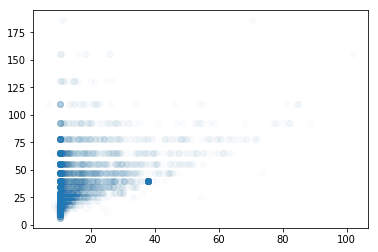

In [716]:
plt.scatter(fullpandasdataframefull['glorys_mld'], fullpandasdataframefull['glorysmld_new001'], alpha=0.02)
plt.scatter(fullpandasdataframefull['glorys_mld'], fullpandasdataframefull['glorysmld_new003'], alpha=0.02)

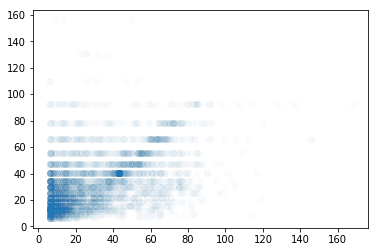

In [719]:
plt.scatter(fullpandasdataframefull['003densmld'], fullpandasdataframefull['glorysmld_new001'], alpha=0.02)

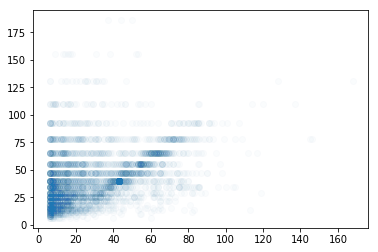

In [724]:
plt.scatter(fullpandasdataframefull['003densmld'], fullpandasdataframefull['glorysmld_new003'], alpha=0.02)

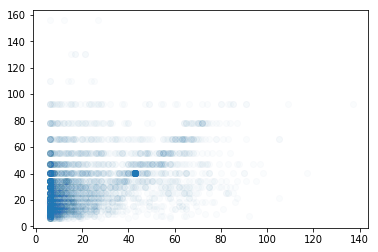

In [725]:
plt.scatter(fullpandasdataframefull['001densmld'], fullpandasdataframefull['glorysmld_new001'], alpha=0.02)

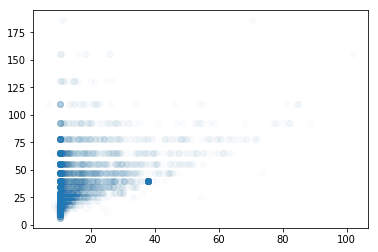

In [727]:
plt.scatter(fullpandasdataframefull['glorys_mld'], fullpandasdataframefull['glorysmld_new003'], alpha=0.02)

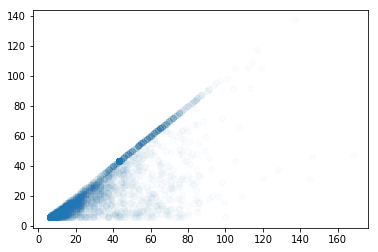

In [720]:
plt.scatter(fullpandasdataframefull['003densmld'], fullpandasdataframefull['001densmld'], alpha=0.02)

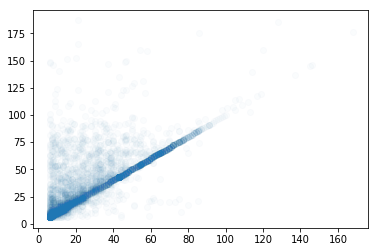

In [721]:
plt.scatter(fullpandasdataframefull['003densmld'], fullpandasdataframefull['02tempmld'], alpha=0.02)

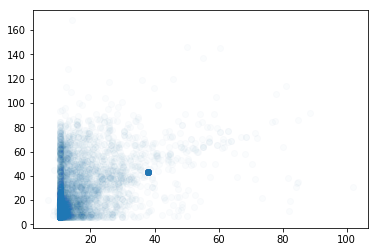

In [723]:
plt.scatter(fullpandasdataframefull['glorys_mld'], fullpandasdataframefull['003densmld'], alpha=0.02)

In [265]:
fullpandasdataframe = fullpandasdataframe.drop(columns=['location'])

In [470]:
ZC.to_csv('01_full.csv')

In [191]:
np.nanmean(full['gmld_w001densrun'])
np.nanmean(full['gmld_w003densrun'])

44.27323651987018

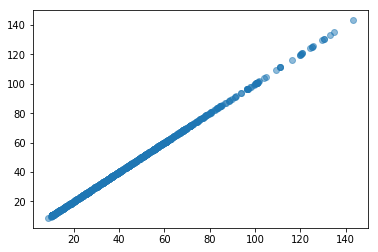

In [192]:
plt.scatter(full['gmld_w001densrun'], full['gmld_w003densrun'], alpha=0.5)

In [1028]:
ZC = pd.read_csv('06_full.csv')

In [1030]:
print(np.nanmean(ZC['glorysmld_new001_x']))
print(np.nanmean(ZC['glorysmld_new001_y']))

14.807622572617937
24.40240361069715


In [1031]:
ZC = ZC.rename(columns={"glorysmld_new001_x": "glorysmld_new001", "glorysmld_new001_y": "glorysmld_new003"})

In [1032]:
print(ZC)

      Unnamed: 0  001densmld  003densmld  glorys_lat_index  glorys_lon_index  \
0            1.0         6.0        10.0              83.0             145.0   
1            2.0         6.0         6.0              81.0             143.0   
2            3.0         6.0         7.0              80.0             142.0   
3            4.0         9.0        10.0              79.0             144.0   
4            5.0         7.0         8.0              78.0             141.0   
...          ...         ...         ...               ...               ...   
3320      2837.0         NaN         NaN              69.0              78.0   
3321      2852.0         NaN         NaN              55.0              67.0   
3322      2893.0         NaN         NaN              67.0              75.0   
3323      2894.0         NaN         NaN              67.0              75.0   
3324      2945.0         NaN         NaN              74.0             110.0   

      bottomdepth  date_no  02tempmld  

In [1033]:
ZC.to_csv('06_full.csv')

In [ ]:
jan_list = [pd.read_csv('savedall/jan_x.csv'),pd.read_csv('savedall/jan_v.csv'),pd.read_csv('savedall/jan_w.csv'),
           pd.read_csv('savedall/jan_y.csv'),pd.read_csv('savedall/jan_t.csv')]
jan = pd.concat(jan_list)

In [1599]:
countwithinpolygon = []; densmld = []; obs_lat = []; obs_lon = []; date_no = []; bottomdepth = []; years = []
yearwithdata = []; datefull = []; finallatestdepth = []; glorysmld = []
glorys_lat = []; glorys_lon = []; glorys_lat_index = []; glorys_lon_index = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; counterii = []
    t_intermediate = []; yd_intermediate = []; sal_intermediate = []; floor_intermediate = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd >= 0 and yd <= 365:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        if polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_v.contains(point) == True:
#             countwithinpolygon.append(gear)
            countwithinpolygon.append(1)

In [1600]:
print(len(countwithinpolygon))

38343


In [1597]:
from collections import Counter

Counter(countwithinpolygon).keys()
Counter(countwithinpolygon).values()

dict_values([19800, 12829, 2959, 2755])

In [1598]:
Counter(countwithinpolygon).keys()



dict_keys(['SBE-19', 'SBE-19+', 'SBE-19+V2', 'SBE-911+'])

In [1586]:
print(len(countwithinpolygon))

38343


In [1581]:
myset = set(countwithinpolygon)
print(myset)

{'SBE-911+', 'SBE-19+V2', 'SBE-19', 'SBE-19+'}


In [1582]:
sum('SBE-19+' in s for s in countwithinpolygon)

15788

In [1589]:
sum('SBE-19' in s for s in countwithinpolygon)

35588

In [1584]:
sum('SBE-911+' in s for s in countwithinpolygon)

2755

In [1585]:
sum('SBE-19+V2' in s for s in countwithinpolygon)

2959

In [1593]:
2755 + 2959 + 15788 + 19800

41302

In [1561]:
ZC = [pd.read_csv('01.csv'),pd.read_csv('02.csv'),pd.read_csv('03.csv'),pd.read_csv('04.csv'),
      pd.read_csv('05.csv'),pd.read_csv('06.csv'),pd.read_csv('07.csv'),
      pd.read_csv('08.csv'),pd.read_csv('09.csv'),pd.read_csv('10.csv'),pd.read_csv('11.csv'),
     pd.read_csv('12.csv')]



In [1562]:
fall_season = pd.concat(ZC)

In [1564]:
print(fall_season.shape)

(38340, 9)


In [1567]:
12607 + 11613 + 4795 + 9325


38340

In [365]:
dens_threshold = 0.03

In [57]:
countwithinpolygon = []; densmld = []; obs_lat = []; obs_lon = []; date_no = []; bottomdepth = []; years = []
yearwithdata = []; datefull = []; finallatestdepth = []; glorysmld = []
glorys_lat = []; glorys_lon = []; glorys_lat_index = []; glorys_lon_index = []
slopes_list = []; df_forslope_count = []

for year in range(2015,2016):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; counterii = []
    t_intermediate = []; yd_intermediate = []; sal_intermediate = []; floor_intermediate = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59): 
        if yd > 151 and yd <= 243:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_v.contains(point) == True:
            SA = gsw.SA_from_SP(month_df['s'].iloc[ii],month_df['p'].iloc[ii],month_df['lon'].iloc[ii],month_df['lat'].iloc[ii])
            CT = gsw.CT_from_pt(SA,month_df['t'].iloc[ii])
            DENS = gsw.sigma0(SA,CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=5] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)): #for iii in range(numrange[-1]+1,len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
#             print(df_final)
#             df_forslope['pressure'] = df_final[df_final[0] <= 20][0]
#             print(df_forslope)
#             df_forslope = df_forslope['pressure'].dropna()
#             print(df_forslope)
#             print('7777')
#             print('')
#             if len(df_forslope) > 1:
#                 df_forslope_count.append(1)
#     print(year, len(df_forslope_count),len(countwithinpolygon))
            
#             if len(df_forslope) > 1:
#                 print(df_forslope)
            
#                 slopes = df_forslope.apply(lambda x: np.polyfit(df_forslope.index, x, 1)[0])
#                 print(slopes)
                        
                
#             print(dffin)
#             for ix in range(len(dffinunreversed)):
#                 print('***********')
#                 print(dffinunreversed)
#                 if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                     if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + dens_threshold) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - dens_threshold):
#                         looknow = list(dffinunreversed['density'].values)
#                         looknow2 = [i for i in looknow if i >= (surfacevalmean + dens_threshold)]
#                         looknow3 = [i for i in looknow if i <= (surfacevalmean - dens_threshold)]
#                         if len(looknow2) == 0 and len(looknow3) == 0:
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
# #                                 densmld.append(month_df['depth'].iloc[ii])
# #                                 obs_lat.append(month_df['lat'].iloc[ii])
# #                                 obs_lon.append(month_df['lon'].iloc[ii])
# #                                 date_no.append(month_df['day'].iloc[ii])
# #                                 bottomdepth.append(month_df['depth'].iloc[ii])
# #                                 years.append(year)
# #                                 counterii.append(ii)
#                                 if len(df_forslope) > 1:
#                                     densmld.append(month_df['depth'].iloc[ii])
#                                     slopes = df_forslope.apply(lambda x: np.polyfit(df_forslope.index, x, 1)[0])
#                                     slopes_list.append(slopes)
#                                     obs_lat.append(month_df['lat'].iloc[ii])
#                                     obs_lon.append(month_df['lon'].iloc[ii])
#                                     date_no.append(month_df['day'].iloc[ii])
#                                     bottomdepth.append(month_df['depth'].iloc[ii])
#                                     years.append(year)
#                                 # PLOTTING
# #                                 plt.plot(df_final[4], df_final[0]*-1)
# #                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.show()
#                                 break
#                             else:#here
# #                                 plt.plot(df_final[4], df_final[0]*-1)
# #                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='darkblue', linestyle='--',alpha = 1)
# #                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.show()
#                                 break 
#                         else:
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10)):
#                                 for ix in range(len(dffinunreversed['density'])):
#                                     if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
#                                         pass
#                                     else:
# #                                         densmld.append(month_df['depth'].iloc[ii])
# #                                         obs_lat.append(month_df['lat'].iloc[ii])
# #                                         obs_lon.append(month_df['lon'].iloc[ii])
# #                                         date_no.append(month_df['day'].iloc[ii])
# #                                         bottomdepth.append(month_df['depth'].iloc[ii])
# #                                         years.append(year)
# #                                         counterii.append(ii)
#                                         if len(df_forslope) > 1:
#                                             densmld.append(month_df['depth'].iloc[ii])
#                                             slopes = df_forslope.apply(lambda x: np.polyfit(df_forslope.index, x, 1)[0])
#                                             slopes_list.append(slopes)
#                                             obs_lat.append(month_df['lat'].iloc[ii])
#                                             obs_lon.append(month_df['lon'].iloc[ii])
#                                             date_no.append(month_df['day'].iloc[ii])
#                                             bottomdepth.append(month_df['depth'].iloc[ii])
#                                             years.append(year)
#                                         #plotting
# #                                         plt.plot(df_final[4], df_final[0]*-1)
# #                                         plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='gray', linestyle='--',alpha = 1)
# #                                         plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
# #                                         plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                         plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                         plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
# #                                         plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
# #                                         plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
# #                                         plt.show()
#                                         break
#                                 break
#                             else:
#                                 break
#                     else: 
#                         if dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
#                             if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
#                                 pass
#                             else:
# #                                 densmld.append(dffinunreversed.at[ix,'pressure'])
# #                                 obs_lat.append(month_df['lat'].iloc[ii])
# #                                 obs_lon.append(month_df['lon'].iloc[ii])
# #                                 date_no.append(month_df['day'].iloc[ii])
# #                                 bottomdepth.append(month_df['depth'].iloc[ii])
# #                                 years.append(year)
# #                                 counterii.append(ii)
#                                 if len(df_forslope) > 1 :
#                                     densmld.append(dffinunreversed.at[ix,'pressure'])
#                                     slopes = df_forslope.apply(lambda x: np.polyfit(df_forslope.index, x, 1)[0])
#                                     slopes_list.append(slopes)
#                                     obs_lat.append(month_df['lat'].iloc[ii])
#                                     obs_lon.append(month_df['lon'].iloc[ii])
#                                     date_no.append(month_df['day'].iloc[ii])
#                                     bottomdepth.append(month_df['depth'].iloc[ii])
#                                     years.append(year)
# #                                 PLOTTING 
# #                                 plt.plot(df_final[4], df_final[0]*-1)
# #                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='purple', linestyle='--',alpha = 0.5)
# #                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean+0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=surfacevalmean-0.03,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.show()
#                                 break           
#                         else: 
#                             if dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold):
#                                 break 
#                 elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - dens_threshold) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + dens_threshold):
#                     if (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] <= 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 5)) or (dffinunreversed.at[len(dffinunreversed)-1,'pressure'] > 25 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 10) and dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 10)):
#                         pass
#                     else:
#                         for ix in range(len(dffinunreversed['density'])):
#                             if dffinunreversed.at[ix,'density'] >= (surfacevalmean - dens_threshold) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + dens_threshold):
# #                                 print(dffinunreversed.at[ix,'density'])
#                                 pass
#                             else:
# #                                 print('no')
# #                                 print('surfacevalmean: ', surfacevalmean)
# #                                 densmld.append(dffinunreversed.at[ix,'pressure'])
# #                                 obs_lat.append(month_df['lat'].iloc[ii])
# #                                 obs_lon.append(month_df['lon'].iloc[ii])
# #                                 date_no.append(month_df['day'].iloc[ii])
# #                                 bottomdepth.append(month_df['depth'].iloc[ii])
# #                                 years.append(year)
# #                                 counterii.append(ii)
#                                 if len(df_forslope) > 1 :
#                                     densmld.append(dffinunreversed.at[ix,'pressure'])
#                                     slopes = df_forslope.apply(lambda x: np.polyfit(df_forslope.index, x, 1)[0])
#                                     slopes_list.append(slopes)
#                                     obs_lat.append(month_df['lat'].iloc[ii])
#                                     obs_lon.append(month_df['lon'].iloc[ii])
#                                     date_no.append(month_df['day'].iloc[ii])
#                                     bottomdepth.append(month_df['depth'].iloc[ii])
#                                     years.append(year)
#                                 # PLOTTING
# #                                 plt.plot(df_final[1], df_final[0]*-1)
# #                                 plt.plot(df_final[4], df_final[0]*-1)
# #                                 plt.axhline(y=dffinunreversed.at[ix,'pressure']*-1,color='darkblue', linestyle='--',alpha = 1)
# #                                 plt.axhline(y=month_df['depth'].iloc[ii]*-1,color='black', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1,color='red', linestyle='-',alpha = 0.5)
# #                                 plt.axhline(y=5*-1,color='green', linestyle='--',alpha = 1)
# #                                 plt.axhline(y=47*-1,color='black',linewidth=2.0, linestyle='--',alpha = 1)
# # #                                 plt.axvline(x=7.0360000000000005,color='green', linestyle='--',alpha = 1)
# # #                                 plt.axvline(x=7.0360000000000005+0.2,color='green', linestyle='--',alpha = 0.5)
# # #                                 plt.axvline(x=7.0360000000000005-0.2,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=surfacevalmean,color='green', linestyle='--',alpha = 1)
# #                                 plt.axvline(x=surfacevalmean+dens_threshold,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.axvline(x=surfacevalmean-dens_threshold,color='green', linestyle='--',alpha = 0.5)
# #                                 plt.show()
#                                 break
#                         break
#                 else: 
#                     break
#     print(year)

In [59]:
print(len(countwithinpolygon))

90


In [48]:
4684 4795

SyntaxError: invalid syntax (<ipython-input-48-12e444453a13>, line 1)

In [40]:
print(len(densmld))
print(len(bottomdepth))
print(len(slopes_list))

2946
2946
2946


In [393]:
diff_add = []; same = []; opposite = []
temp_slope = []; sal_slope = []; density_slope = []
for i in range(len(slopes_list)):
    temp_val = slopes_list[i][0]
    sal_val = slopes_list[i][1]
    density_val = slopes_list[i][3]
    temp_slope.append(temp_val)
    sal_slope.append(sal_slope)
    density_slope.append(density_val)
    diff_add.append(abs(temp_val) - abs(density_val))
    if temp_val > 0 and density_val > 0:
        same.append(abs(temp_val) - abs(density_val))
        opposite.append(1)
    else:
        same.append(0)
#     elif temp_val < (-0.3485091148792271-0.0.3320501673436184) and density_val < (0.1097800068095043+0.030805025375552755):
#         same.append(0)
#     elif temp_val < (-0.045908268253141454-0.09978643121941348) and density_val > (0.019573957760964548+0.030805025375552755):
#         same.append(0)
#     else:
#         same.append(0)

In [398]:
print(len(same))
print(len(opposite))

5705
1131


In [394]:
newdf = pd.DataFrame({'temp_slope': temp_slope,'dens_slope': density_slope, 'lon': obs_lon, 'lat': obs_lat, 'diff_add': diff_add})

newdf = pd.DataFrame({'same':same,'temp_slope': temp_slope,'dens_slope': density_slope, 'lon': obs_lon, 'lat': obs_lat, 'diff_add': diff_add})




In [395]:
print(np.nanstd(newdf['temp_slope']))
print(np.nanmean(newdf['temp_slope']))

print(np.nanstd(newdf['dens_slope']))
print(np.nanmean(newdf['dens_slope']))

0.09978643121941348
-0.045908268253141454
0.030805025375552755
0.019573957760964548


In [396]:
print(np.nanmean(same))
print(np.nanmax(same))
print(np.nanmin(same))
print(len(same))
print(len(opposite))

0.0046705635533708
1.0627856323774583
-0.2096970394412208
5705
1131


In [375]:
import numpy as np
from matplotlib.path import Path

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

grid = path_new.contains_points(points) 
grid = grid.reshape((22,22))

In [376]:
newdf = pd.DataFrame({'same':same,'temp_slope': temp_slope,'dens_slope': density_slope, 'lon': obs_lon, 'lat': obs_lat, 'diff_add': diff_add})


In [377]:
from scipy.interpolate import griddata

In [378]:
# winter_season_remove5 # spring_season_remove5 # summer_season_remove5 # fall_season_remove5
x = newdf['lon']*-1
y = newdf['lat']
z = newdf['same'] #temp_slope
c = newdf['dens_slope']

xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

xi,yi = np.meshgrid(xi,yi)
    
zi = griddata((x,y),z,(xi,yi),method='linear')
ci = griddata((x,y),c,(xi,yi),method='linear')
   
zi = zi.reshape((22,22)) ###
ci = zi.reshape((22,22)) ###

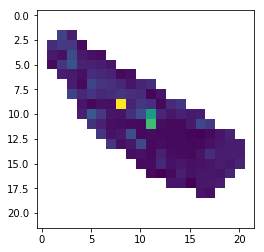

In [379]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(zi)

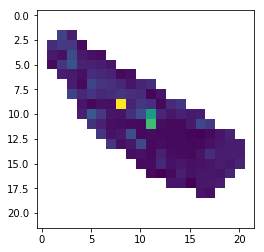

In [380]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ci)

In [381]:
newmeangridnew = np.nanmean([zi],axis = 0)
newmeangridnewc = np.nanmean([ci],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


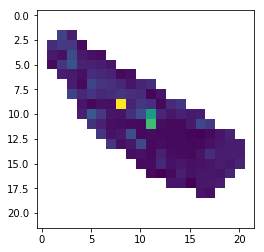

In [382]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newmeangridnew)

In [383]:
griddednewlate = np.where(grid == True, newmeangridnew, grid)
griddednewlatec = np.where(grid == True, newmeangridnewc, grid)

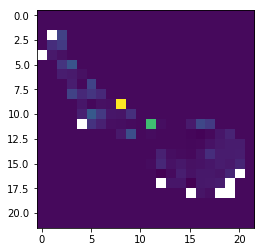

In [384]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlate)

In [385]:
d = np.where(np.isnan(griddednewlate), 0, griddednewlate)
e = np.where(np.isnan(griddednewlate), 0, griddednewlatec)

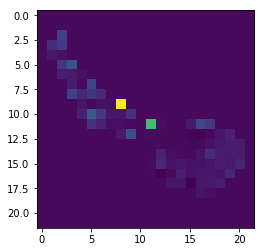

In [386]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(d)

In [387]:
print(np.nanmax(d))
print(np.nanmean(d))
print(np.nanmin(d))
print('')
print(np.nanmax(c))
print(np.nanmean(c))
print(np.nanmin(c))

0.26067736783503714
0.0035686137180591477
-0.006553360130163777

0.31008104135513825
0.01015628942783558
-0.03369002360772969


In [388]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)
projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

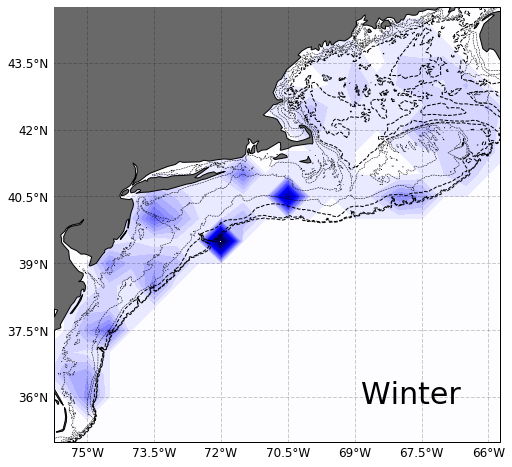

In [390]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Winter', dict(size=30))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,d, np.arange(0, 02,0.01), cmap = cmap)
cf = plt.contourf(xi,yi,d, np.arange(-0.25, 0.25,0.01), cmap = 'seismic_r')
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.5,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
# cbar = plt.colorbar(cf, ticks=[-0.25,-0.20,-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25], orientation='horizontal')
# cbar.ax.set_xticklabels([-0.25,-0.20,-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25])



# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([-80,-60,-40,-20,0,20,40,60,80])
# # # # cbar = plt.colorbar(cf, ax=ax)
# # cbar.ax.get_yaxis().labelpad = 20
# cbar.ax.set_ylabel('Slope difference', rotation=270, fontsize = 15)
# # # # # cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])
# cbar.ax.tick_params(labelsize=12)

plt.savefig('Fall_temp-dens_slopes')

plt.show()

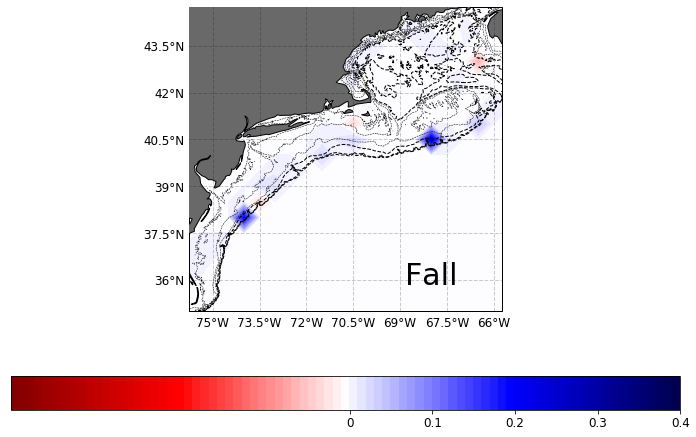

In [341]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Fall', dict(size=30))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,d, np.arange(0, 1.02,0.01), cmap = cmap)
cf = plt.contourf(xi,yi,e, np.arange(-0.41, 0.41,0.01), cmap = 'seismic_r')
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.5,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], orientation='horizontal')
cbar.ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])



# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([-80,-60,-40,-20,0,20,40,60,80])
# # # # cbar = plt.colorbar(cf, ax=ax)
# # cbar.ax.get_yaxis().labelpad = 20
# cbar.ax.set_ylabel('MLD (m)', rotation=270, fontsize = 15)
# # # # # cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])
cbar.ax.tick_params(labelsize=12)

# plt.savefig('Fall_temp-dens')

plt.show()

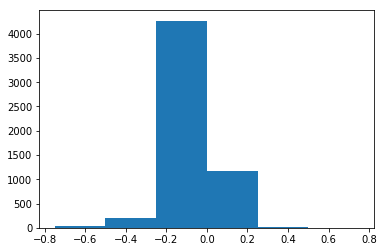

In [15]:
plt.hist(temp_slope,[-0.75,-0.50,-0.25,0,0.25,0.5,0.75])
plt.show()
# plt.hist(density_slope,[-0.75,-0.50,-0.25,0,0.25,0.5,0.75])

In [16]:
# plt.hist(density_slope,[-0.75,-0.50,-0.25,0,0.25,0.5,0.75])
# plt.show()

In [30]:
slope_compare = pd.DataFrame({'densityslope':density_slope,'tempslope': temp_slope, 'diff_compare': diff_add})



In [ ]:
same = []
zero = []
opposite = []
for i in range(len(slope_compare)):
    if slope_compare['densityslope'][i] > 1 and slope_compare['tempslope'][i] > 1:
        same.append(1)
    elif slope_compare['densityslope'][i] < 1 and slope_compare['tempslope'][i] > 1:
        opposite.append(1)
    elif slope_compare['densityslope'][i] > 1 and slope_compare['tempslope'][i] < 1:
        opposite.append(1)
    elif slope_compare['densityslope'][i] == 0 and slope_compare['tempslope'][i] == 0:
        zero.append()

In [31]:
print(slope_compare)

      densityslope  tempslope  diff_compare
0         0.009125   0.051588      0.042463
1         0.010311  -0.000368     -0.009943
2        -0.000123   0.001294      0.001171
3         0.008987  -0.024088      0.015101
4         0.002816  -0.011809      0.008993
...            ...        ...           ...
5700      0.002573  -0.017254      0.014681
5701      0.057553  -0.156392      0.098839
5702      0.051295  -0.144935      0.093640
5703      0.028770  -0.145796      0.117026
5704      0.031026  -0.146688      0.115662

[5705 rows x 3 columns]


In [21]:
print(np.nanmin(density_slope))

-0.0217782713856438


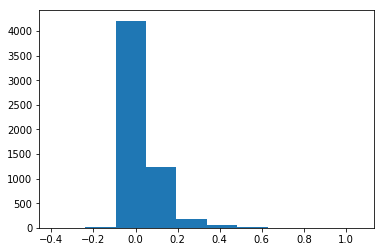

In [32]:
plt.hist(diff_add)
plt.show()

5705


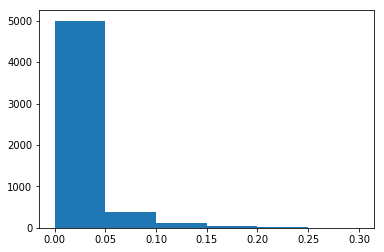

In [33]:
print(len(density_slope))
plt.hist(density_slope,[0.00,0.05,0.10,0.15,0.20,0.25,0.30])
plt.show()